In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

In [31]:
#First read shop
#ping.csv and put it in a dataframe and transform advertisment into binary, undnerstand the data
Shopping = pd.read_csv('shopping.csv')
Shopping.head()
Shopping.info()
Shopping.describe()
Shopping.columns


Shopping.replace({'online': 1, 'none': 0}, inplace=True)

Shopping.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
advertisement    100 non-null object
shopping.time    100 non-null int64
turnover         100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


,advertisement,shopping.time,turnover
0,1,33,84
1,1,31,78
2,1,35,109
3,1,32,82
4,1,32,79


In [32]:
#Correlation between each of the attributes here it shows that shopping time has more influence on the turnover
#here it hows tha the shopping time has more effect on the turnover
Shopping.corr()


,advertisement,shopping.time,turnover
advertisement,1.000000,0.698986,0.247273
shopping.time,0.698986,1.000000,0.286727
turnover,0.247273,0.286727,1.000000


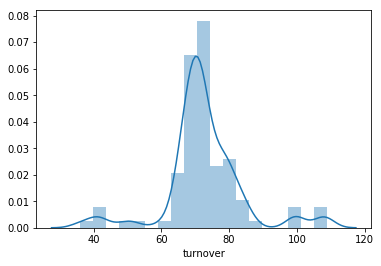

In [33]:
#
sns.distplot(Shopping['turnover'])

In [34]:
#Split the train & test data
from sklearn.model_selection import train_test_split
X = Shopping[['shopping.time']]
y = Shopping['turnover']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

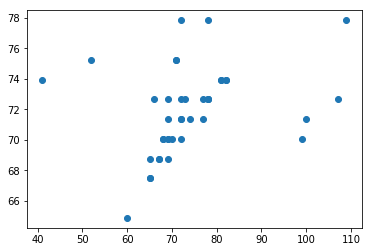

In [35]:
# initialize the LR model and fit the training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

#Make predictions based on the test set and plot 
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

('Coefficients: \n', array([1.29468621]))
Mean squared error: 150.34
Variance score: 0.05


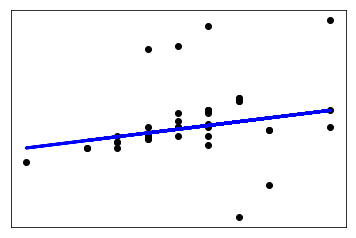

In [36]:
#Draw the Linear regression line, retrieve the mean square error and the variance score
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,predictions))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()